In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1 import utils
from matplotlib import pyplot as plt
from fastf1 import plotting
from matplotlib.patches import Rectangle
import numpy as np

ff1.Cache.enable_cache('2023Baku') 
race = ff1.get_session(2023, 'Baku', 'R')
race_laps = race.load_laps(with_telemetry=True)
race.load()

In [ ]:

driver = "LEC"
race_laps = race_laps.pick_driver(driver)
# prendo il giro 2 e 51 del pilota
first_real_lap = race_laps.loc[(race_laps['LapNumber']==2)]
last_lap = race_laps.loc[(race_laps['LapNumber']==51)]
team = first_real_lap['Team']
display(first_real_lap)
display(last_lap)


In [49]:
telemetry_first_lap = first_real_lap.get_telemetry().add_distance()
telemetry_last_lap = last_lap.get_telemetry().add_distance()

delta_time, ref_tel, compare_tel = utils.delta_time(first_real_lap, last_lap)

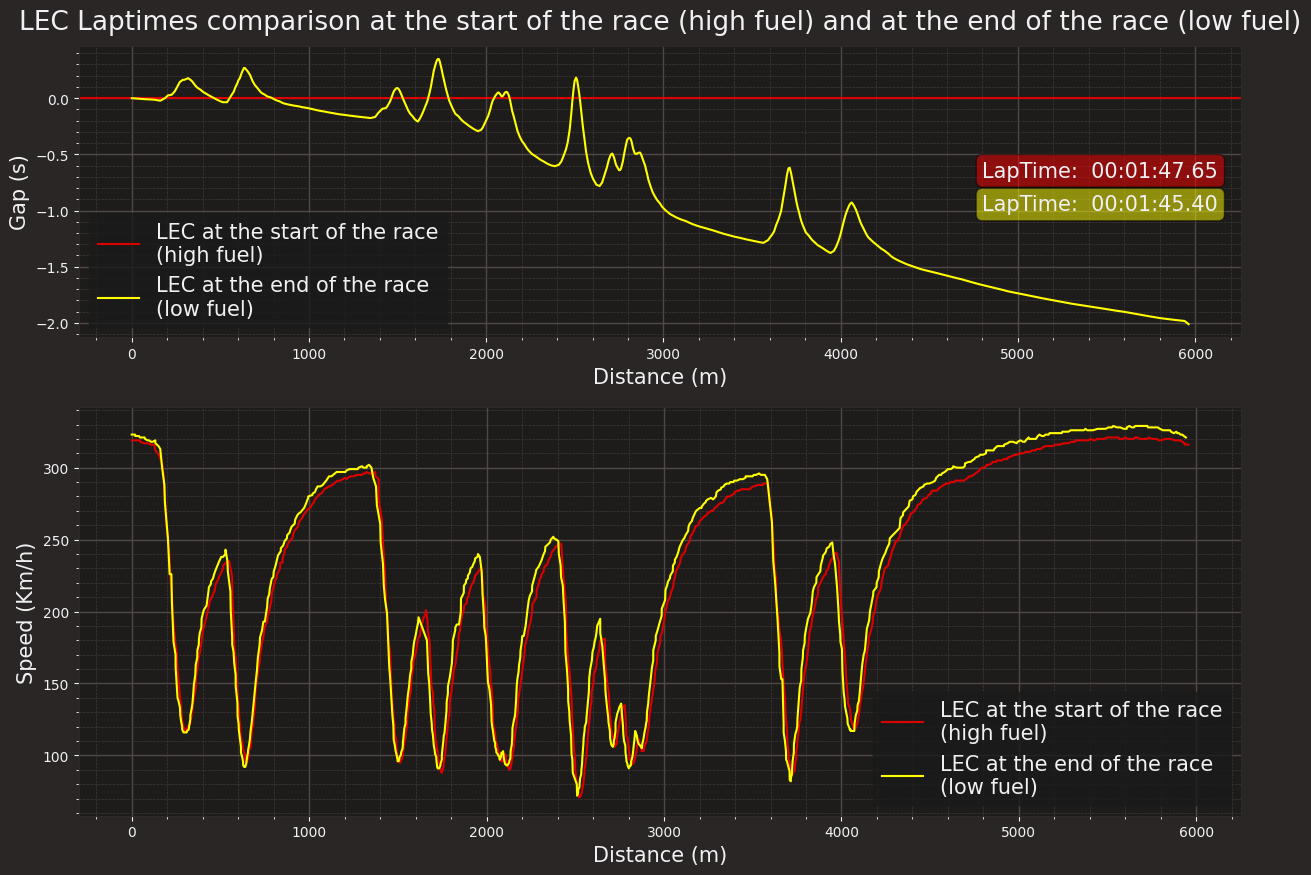

In [88]:
plot_size = [15, 10]
plot_title = f"{driver} Laptimes comparison at the start of the race (high fuel)\nand at the end of the race (low fuel)"
plot_ratios = [0.5, 0.7]
plotting.setup_mpl()
# Make plot a bit bigger
plt.rcParams['figure.figsize'] = plot_size

# Create subplots with different sizes
fig, ax = plt.subplots(2, gridspec_kw={'height_ratios': plot_ratios})

ax[0].title.set_text(plot_title)

# Delta line
ax[0].axhline(0, color=ff1.plotting.team_color("Ferrari"), label = driver+ " at the start of the race\n(high fuel)")
ax[0].plot(ref_tel['Distance'], delta_time, color="yellow", label= driver+ " at the end of the race\n(low fuel)")
ax[0].set_ylabel("Gap (s)", fontsize = 10)
ax[0].set_xlabel("Distance (m)", fontsize=10)
ax[0].yaxis.label.set_size(15)
ax[0].xaxis.label.set_size(15)
ax[0].text(x=4800, y = -0.7, s = f"LapTime: {str(first_real_lap.LapTime)[12:24]}", fontsize=15, bbox=dict(boxstyle='round', facecolor='red', alpha=0.5))
ax[0].text(x=4800, y = -1.0, s = f"LapTime: {str(last_lap.LapTime)[12:24]}", fontsize=15, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
ax[0].legend(loc="lower left", prop={'size': 15})


# Speed trace
ax[1].plot(telemetry_first_lap['Distance'], telemetry_first_lap['Speed'], label=driver+ " at the start of the race\n(high fuel)", color=ff1.plotting.team_color("Ferrari"))
ax[1].plot(telemetry_last_lap['Distance'], telemetry_last_lap['Speed'], label=driver+" at the end of the race\n(low fuel)", color="yellow")
ax[1].set_ylabel("Speed (Km/h)", fontsize=10)
ax[1].set_xlabel("Distance (m)", fontsize=10)
ax[1].yaxis.label.set_size(15)
ax[1].xaxis.label.set_size(15)
ax[1].legend(loc="lower right", prop={'size': 15})